# Global warming levels

Tim Raupach <<t.raupach@unsw.edu.au>>

This notebook contains code to calculate the mean warming over a baseline temperature for a given year range in CMIP5 or CMIP6 experiments. The calculation is as follows:

1. Monthly global mean temperatures are sourced from [IPCC Repository supporting the implementation of FAIR principles in the IPCC-WG1 Atlas](https://github.com/IPCC-WG1/Atlas) (CC-BY-4.0).
2. For a given project (CMIP5/CMIP6) and experiment (RCP8.5, SSP5-8.5 etc), all monthly global mean temperatures are read. The variable is near-surface temperature (`tas`), which is available averaged by region and globally.
3. Annual means are calculated for each model.
4. The baseline temperature is subtracted to get annual temperature changes. Here I am using 13.6 C as the baseline, which the median value for 1850-1900 global mean temperature from CMIP6 models [in the IPCC Atlas](https://interactive-atlas.ipcc.ch/permalink/qwPFMixd).
4. The average of all annual changes within the year range (inclusive) is the resulting change.

In the following plots grey lines are annual average temperature changes for each individual model, and the red line is the annual multimodel mean of those changes. The yellow region is the selected period. The mean change is shown in the plot title and returned by the function `warming_for_period`.

## Similar implementations
* [Mathias Hauser, Francois Engelbrecht, and Erich Fischer](https://github.com/mathause/cmip_warming_levels) have code for calculating the year on which a given warming is reached.
* Similarly, the [IPCC Atlas](https://github.com/IPCC-WG1/Atlas/tree/main/warming-levels) also has code to calculate the year on which a given warming is reached.

## Data sources
Temperature data is from the IPCC Atlas github (CC-BY-4.0):

> Iturbide, M., Fernández, J., Gutiérrez, J.M., Bedia, J., Cimadevilla, E., Díez-Sierra, J., Manzanas, R., Casanueva, A., Baño-Medina, J., Milovac, J., Herrera, S., Cofiño, A.S., San Martín, D., García-Díez, M., Hauser, M., Huard, D., Yelekci, Ö. (2021) Repository supporting the implementation of FAIR principles in the IPCC-WG1 Atlas. Zenodo, DOI: 10.5281/zenodo.3691645. Available from: https://github.com/IPCC-WG1/Atlas 


In [1]:
%cd ~/git/warming_levels
import modules.warming_levels as wl

/home/561/tr2908/git/warming_levels


An example - show mean warming for CMIP5 RCP5-8.5 2070-2090:

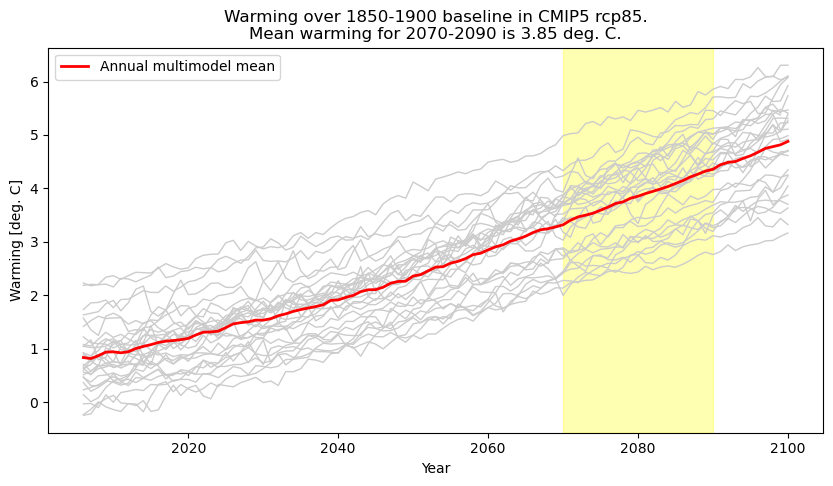

In [2]:
_ = wl.warming_for_period(project='CMIP5', experiment='rcp85', year_range=[2070, 2090])

The same period in CMIP6:

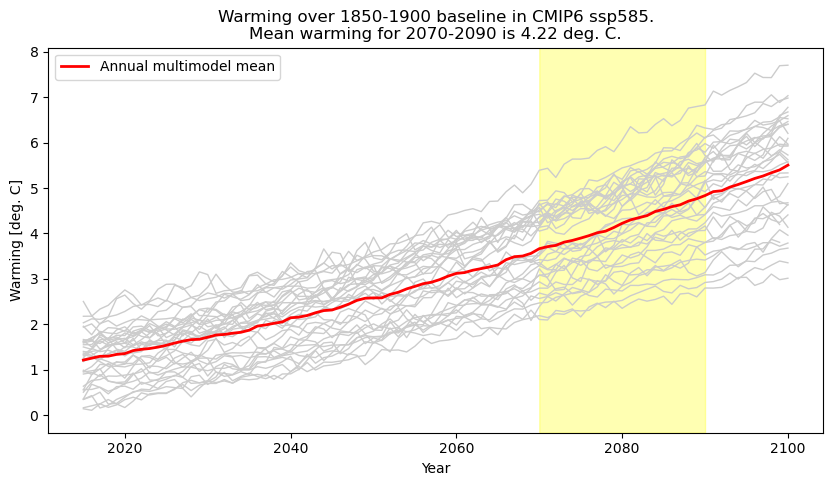

In [3]:
_ = wl.warming_for_period(project='CMIP6', experiment='ssp585', year_range=[2070, 2090])

As a check on the method, here is the mean change over the reference period:

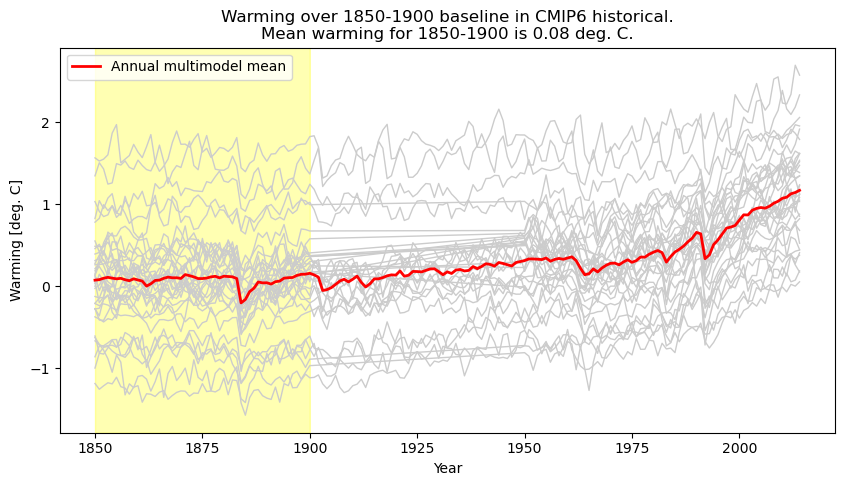

In [4]:
_ = wl.warming_for_period(project='CMIP6', experiment='historical', year_range=[1850, 1900])